# Project Title - Appliance Energy Prediction

## Project Type - Regression

## Contributor - Sourabh Pandey

![picture](https://drive.google.com/uc?export=view&id=1JaMmodtp8gTx3RqiVGXOPKZO-qh36CF_)

# Problem Statement
In today's world the usage of energy is increasing rapidly. Due to more usage of energy in some parts of the world, we are facing a lack of energy and it leads to environmental pollution. In some of the places, we are facing outrageous energy consumption in home appliances, so our main goal in this project is to analyse what the factors are affecting the increasing energy consumption of home appliances, how we can reduce the energy consumption of home appliances, and predict energy consumption of appliances by using regression models

# Business Context
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).
Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

# Dataset Understanding



1.  Date time year-month-day hour:minute:second
2.  Appliances, energy use in Wh
3.  Lights, energy use of light fixtures in the house in Wh
4.  T1, Temperature in kitchen area, in Celsius
5.  RH_1, Humidity in kitchen area, in %
6.  T2, Temperature in living room area, in Celsius
7.  RH_2, Humidity in living room area, in %
8.  T3, Temperature in laundry room area
9.  RH_3, Humidity in laundry room area, in %
10. T4, Temperature in office room, in Celsius
11. RH_4, Humidity in office room, in %
12. T5, Temperature in bathroom, in Celsius
13. RH_5, Humidity in bathroom, in %
14. T6, Temperature outside the building (north side), in Celsius
15. RH_6, Humidity outside the building (north side), in %
16. T7, Temperature in ironing room , in Celsius
17. RH_7, Humidity in ironing room, in %
18. T8, Temperature in teenager room 2, in Celsius
19. RH_8, Humidity in teenager room 2, in %
20. T9, Temperature in parents room, in Celsius
21. RH_9, Humidity in parents room, in %
22. To, Temperature outside (from Chievres weather station), in Celsius
23. Pressure (from Chievres weather station), in mm Hg
24. RH_out, Humidity outside (from Chievres weather station), in %
25. Wind speed (from Chievres weather station), in m/s
26. Visibility (from Chievres weather station), in km
27. Tdewpoint (from Chievres weather station), Â°C
28. rv1, Random variable 1, nondimensional
29. rv2, Random variable 2, nondimensional

# Importing Libraries and Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Connect with Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
data = pd.read_csv('/content/drive/MyDrive/Appliance/data_application_energy.csv')

In [107]:
# To read data Locally
# data = pd.read_csv('/content/data_application_energy.csv')

# Data Cleanup

## Printing the first and last few rows of dataset

In [4]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
data.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


## Checking the shape of Dataset

In [6]:
data.shape

(19735, 29)

### Observation
Our dataset has 19735 rows and 29 columns

## Checking for null values

In [7]:
data.isna().sum().to_frame().rename(columns={0:'Missing Value '})

,Missing Value
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


### Observation
No null values in this dataset

## Checking all the data types of our dataset holds.

In [8]:
data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

### Observation
All columns are numerical except the 'date' column.

## Summary of Dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## Printing columns in our datasets

In [10]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## Statistical analysis of our dataset

To know more about the characteristics of the dataset we are using the data.describe() which by default gives statistical information of all numerical features in our data frame.

In [11]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Observations

1. Max energy usage of appliance is 1080 and min is 10 watt

2. light column having majority of the data 0 values

3. Max pressure outside house is 772.3 mm_hg

4. Except date column There is none catergorical column in the dataset.

5. Average temperature outside is about 7.5 degrees. While it ranges from -6 to 28 degress.

6. There is no null or missing values.

7. Average humidity outside is higher than average humidity inside.

8. Max wind speed is 14 m/s

## Statistical analysis of Categorical Features

In [12]:
data.describe(include=['O'])

,date
count,19735
unique,19735
top,2016-01-11 17:00:00
freq,1


# Exploratory Data Analysis

## Checking distribution of target variables

((array([-3.975457  , -3.75912873, -3.6407481 , ...,  3.6407481 ,
          3.75912873,  3.975457  ]),
  array([  10,   10,   10, ...,  910, 1070, 1080])),
 (77.84427315197463, 97.69495819609833, 0.7591443903885943))

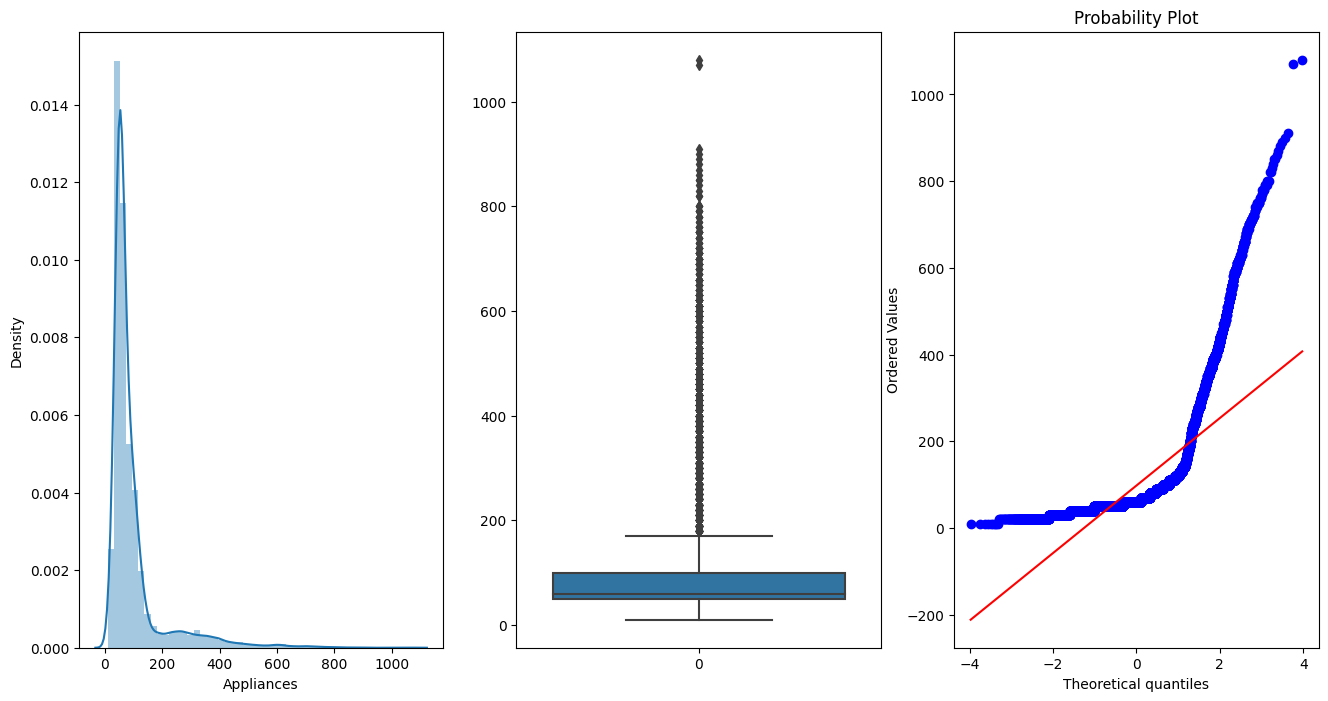

In [13]:
fig,ax=plt.subplots(1,3, figsize=(16,8))
sns.distplot(data.Appliances,ax=ax[0])
sns.boxplot(data.Appliances, ax=ax[1])
stats.probplot(data.Appliances,plot=plt)

### Observations

1. Dependent Variable has many outliers

2. The dependent variable is right skewed

## Checking the skewness of the Dependent Variable

In [14]:
data['Appliances'].skew()

3.3863672147430632

### Observations

1. So our graph is movig towards to y-axis as it's positively skewed and to get better visualization we take Log or Square Root or Exponential of the dependent variable to draw the graph.

## Applying transformation techniques on Dependent Variable

((array([-3.975457  , -3.75912873, -3.6407481 , ...,  3.6407481 ,
          3.75912873,  3.975457  ]),
  array([  10,   10,   10, ...,  910, 1070, 1080])),
 (77.84427315197463, 97.69495819609833, 0.7591443903885943))

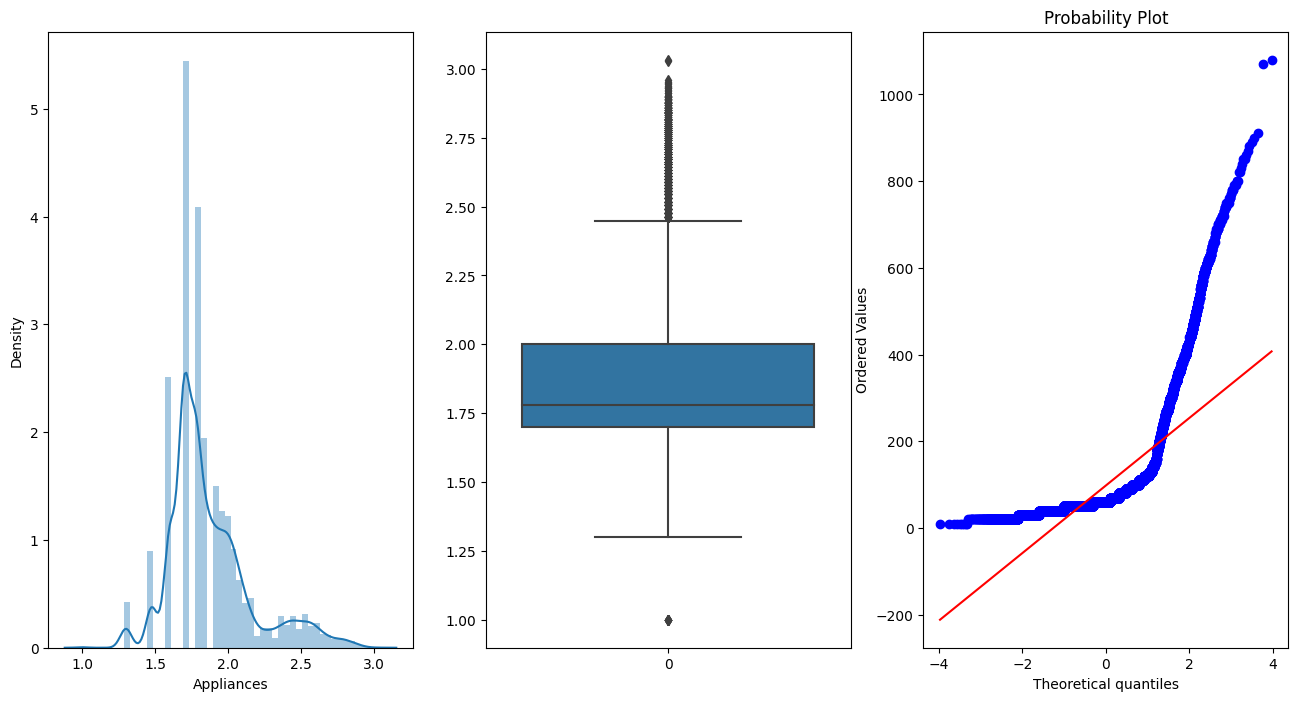

In [15]:
fig,ax=plt.subplots(1,3, figsize=(16,8))
sns.distplot(np.log10(data.Appliances),ax=ax[0])
sns.boxplot(np.log10(data.Appliances), ax=ax[1])
stats.probplot(data.Appliances,plot=plt)

### Observation

1. Transformation with log10 shows that the data has almost normal distribution.

## Checking the skewness of transformed Dependent Variable

In [16]:
np.log10(data['Appliances']).skew()

1.165816888806543

### Observations

1. We observe that none of the transformations makes our target variable perfectly normal,log transformation is giving better results than others.

2. The log Transformation has converted the feature to almost normal distributed. Most of the data points are also falling on the line in the Q-Q plot. So we will be applying log transformation on the target variable.

## Analyzing Frequency distributions of all features

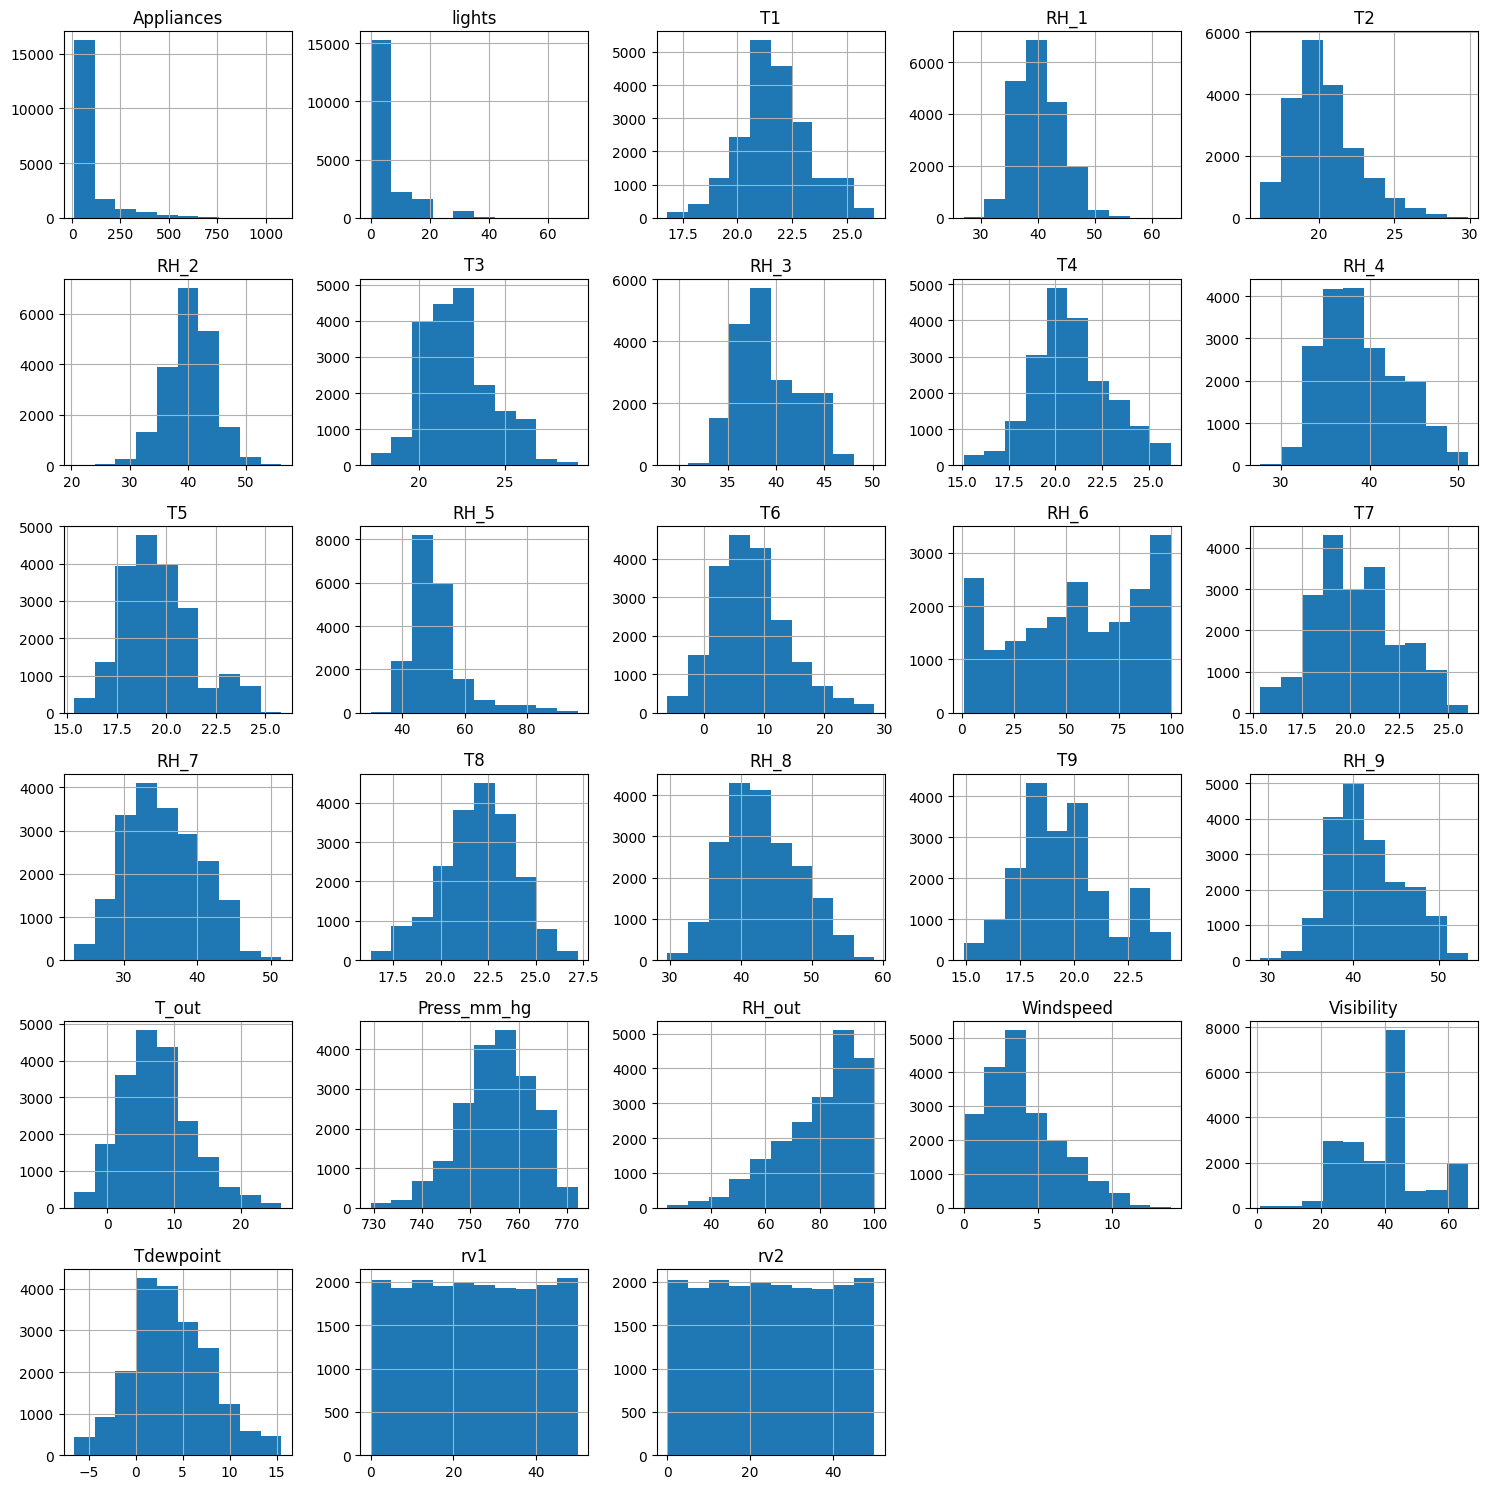

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=data,ax=ax)
plt.tight_layout()

### Observations

1. Except lights, RH6 ,RH _out, light, Appliances windspeed, rv1, rv2 columns the remaining columns have normally distributed data.

In [18]:
data.skew()

Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
dtype: float64

### Observations

1. Positively skewed(>1):- Appliances, RH_5.

2. Moderately Positively skewed(0.5 to 1):- T2, T5, T6, T_out, RH_out, Windspeed.

3. Normal Distributed(-0.5 to +0.5):- T1, T3, T4, T7, T8, T9, RH_1, RH_2, RH_3, RH_4, RH_6, RH_7, RH_8, RH_9, Press_mm_hg, Visibility, Tdewpoint, rv1, rv2,

4. Negative skewed(-0.5 to -1):- No features.

5. Moderately Negtively skewed(>-1):- RH_out.

## Transforming categorical features to numerical (dates)

Appliances' load is dependent on hour, day, week, month. It is logical assumption that in night hours the load is low or at weekends the energy consumption is higher than the weekdays because more people are at home.

Additionaly, it is expected a correlation between temperature/humidity and energy load. For instance, when someone cooks(higher consumption) probably the temperature in the kichen raises.

Moreover, we can use qualitative predictors to indicate if a measured load is lower or higher in comparison to the average energy load for a given time interval.

In [19]:
data["dates"]=pd.to_datetime(data['date'])
data['months']=data["dates"].dt.month
data['hour']=data["dates"].dt.hour

In [20]:
date=data.groupby(data.months)["Appliances"].sum().sort_values(ascending=False)
print(date)

months
3    432800
4    427200
2    421550
5    362950
1    283510
Name: Appliances, dtype: int64


### Plotting graph between appliance and dates

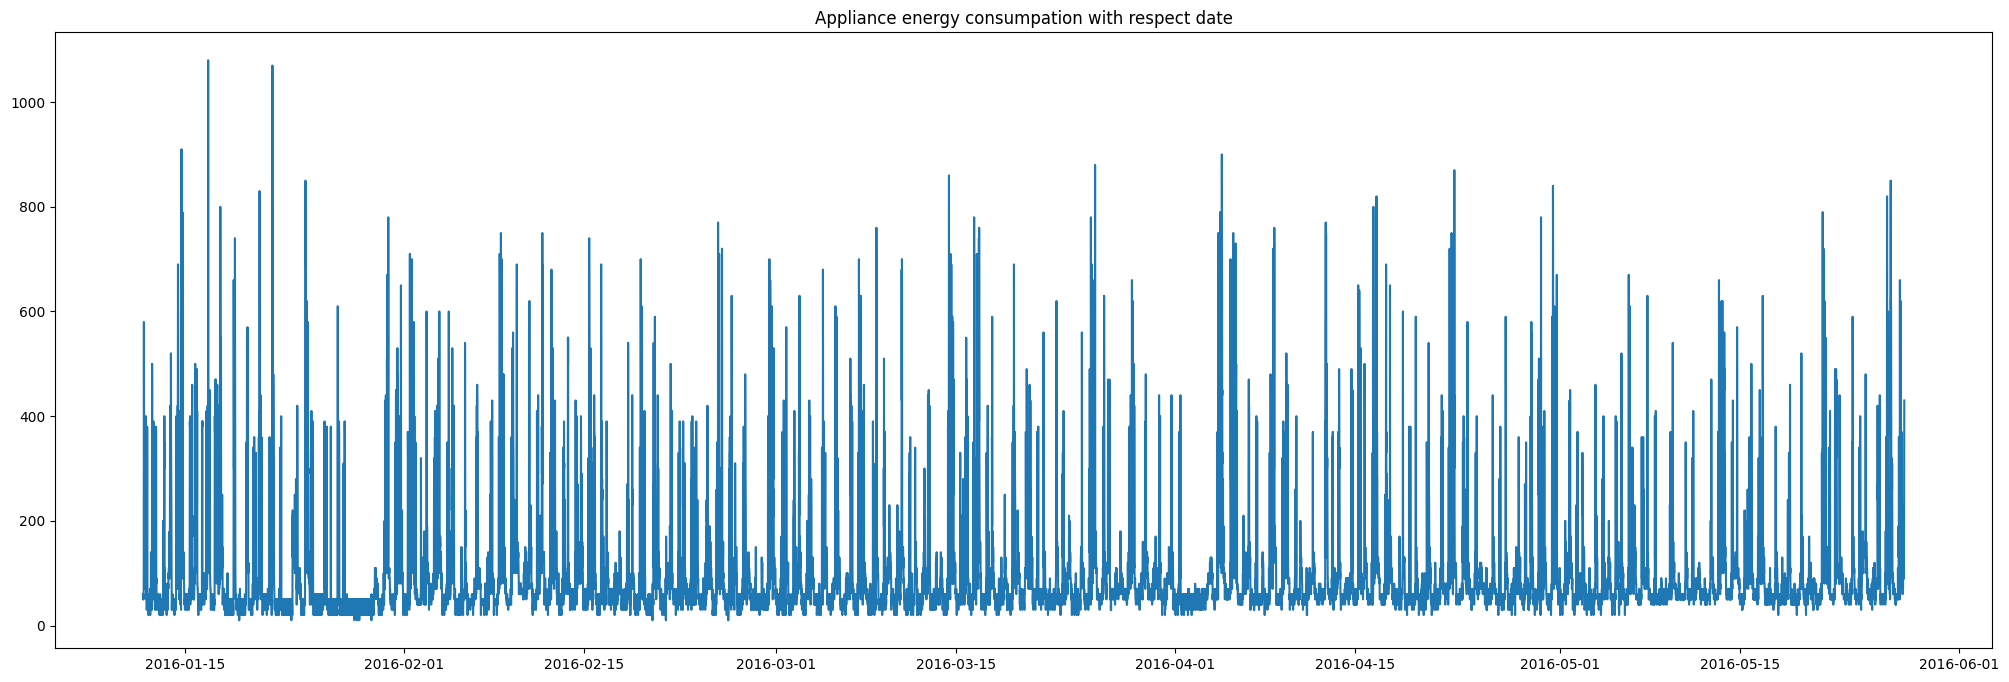

In [21]:
plt.figure(figsize=(25,8))
plt.plot(data.dates, data.Appliances)
plt.title("Appliance energy consumpation with respect date")
plt.show()

### Observations

1. On an average we can say that appliance consume more energy in March and lesser energy in January.

## Energy Consumption vs Pressure

In [22]:
pressure=data.groupby(data.months)["Press_mm_hg"].sum().sort_values(ascending=False)
print(pressure)

months
3    3374073.85
4    3259899.30
2    3146144.25
5    2912476.65
1    2217644.50
Name: Press_mm_hg, dtype: float64


### Plotting graph between pressure and dates

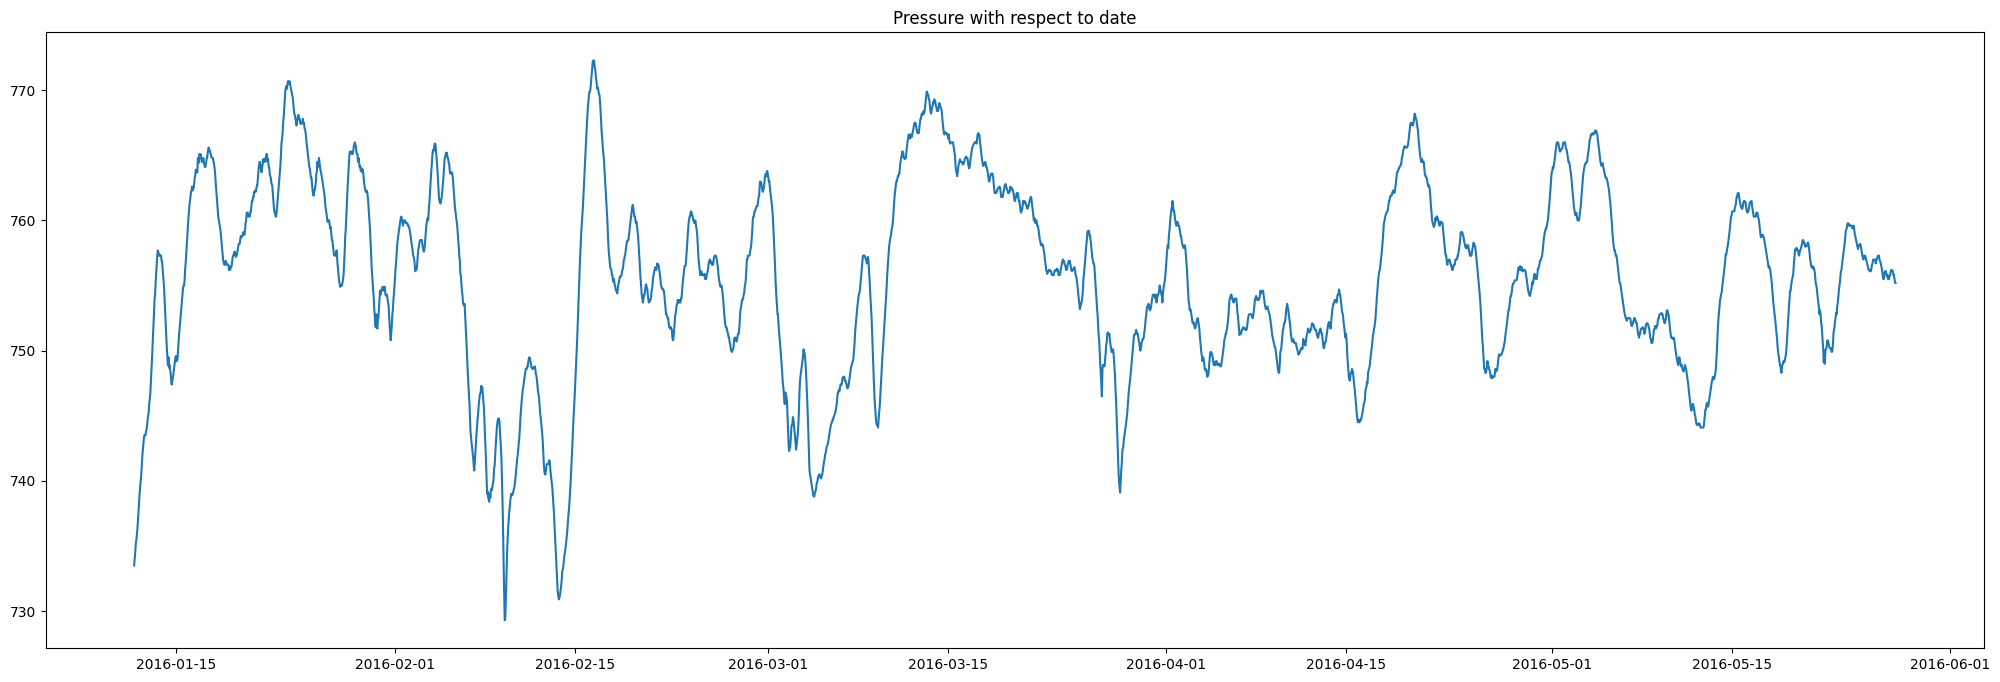

In [23]:
plt.figure(figsize=(25,8))
plt.plot(data.dates, data.Press_mm_hg)
plt.title("Pressure with respect to date")
plt.show()

### Observations

1. March has more avergae pressure and January has lesser average pressure.

2. We can say that pressure has a directly proportional relation with energy consumption

## Energy Consumption vs Windspeed

In [24]:
Windspeed=data.groupby(data.months)["Windspeed"].sum().sort_values(ascending=False)
Windspeed

months
2    20244.5
3    17824.0
4    15778.5
1    14012.5
5    11865.0
Name: Windspeed, dtype: float64

### Plotting graph between Windspeed and Dates

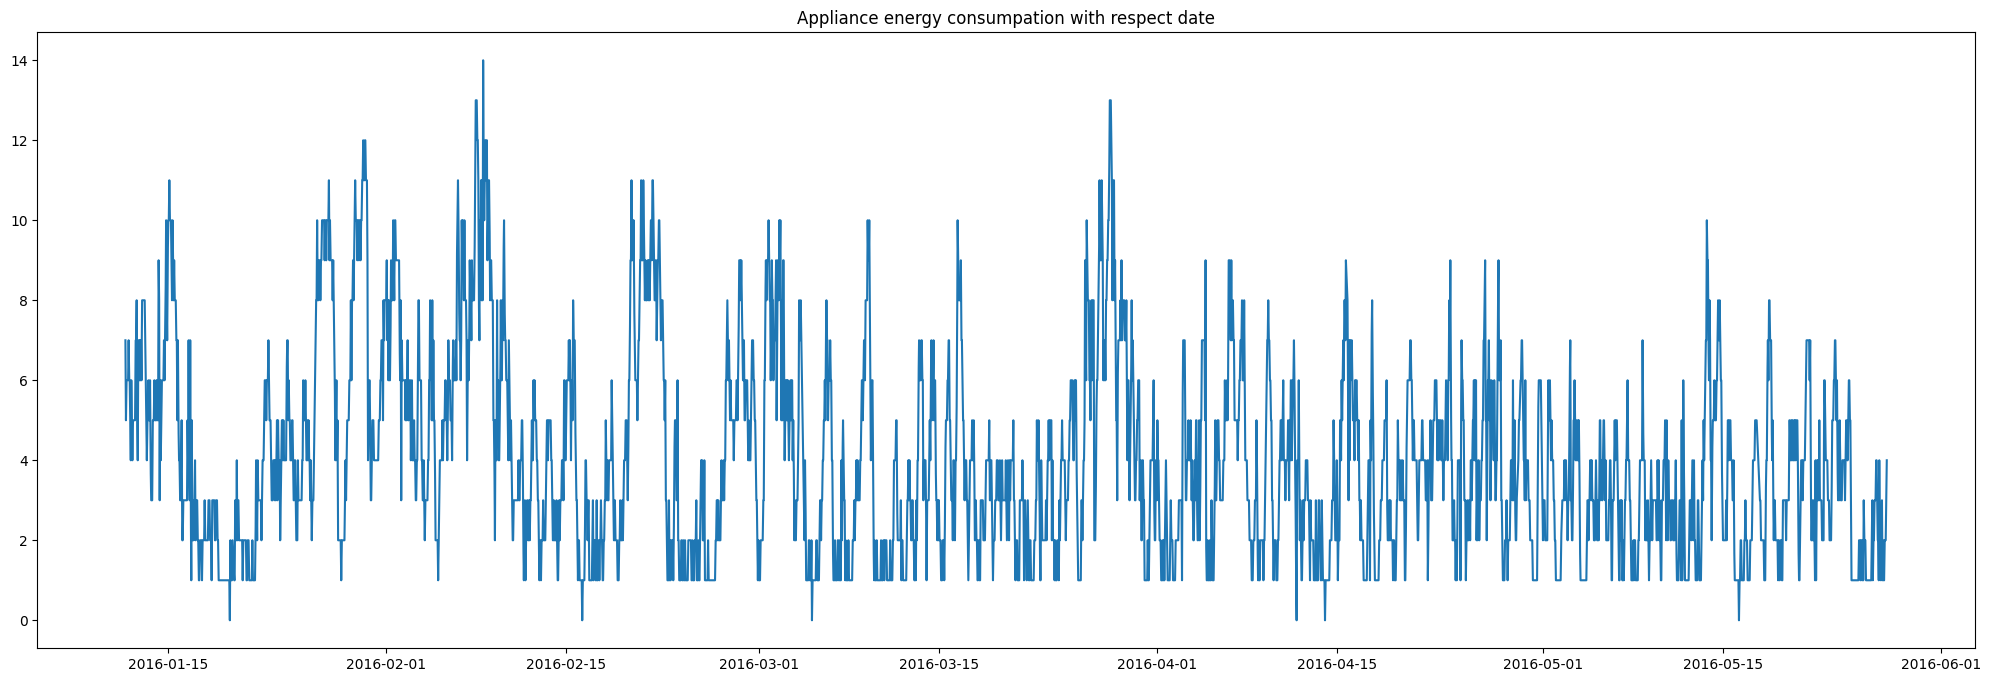

In [25]:
plt.figure(figsize=(25,8))
plt.plot(data.dates, data.Windspeed)
plt.title("Appliance energy consumpation with respect date")
plt.show()

### Observations

1. In February month windspeed in higher but energy consumption is not high or low, so we can conclude that that this feature is not effective for our target variable.

## Let's find out the days of week where the consumption is higest

In [26]:
data['week_days']=data["dates"].dt.dayofweek
Week=data.groupby(data.week_days)["Appliances"].sum().sort_values(ascending=False)
Week

week_days
0    309610
4    297650
5    290690
3    260450
6    259690
2    259000
1    250920
Name: Appliances, dtype: int64

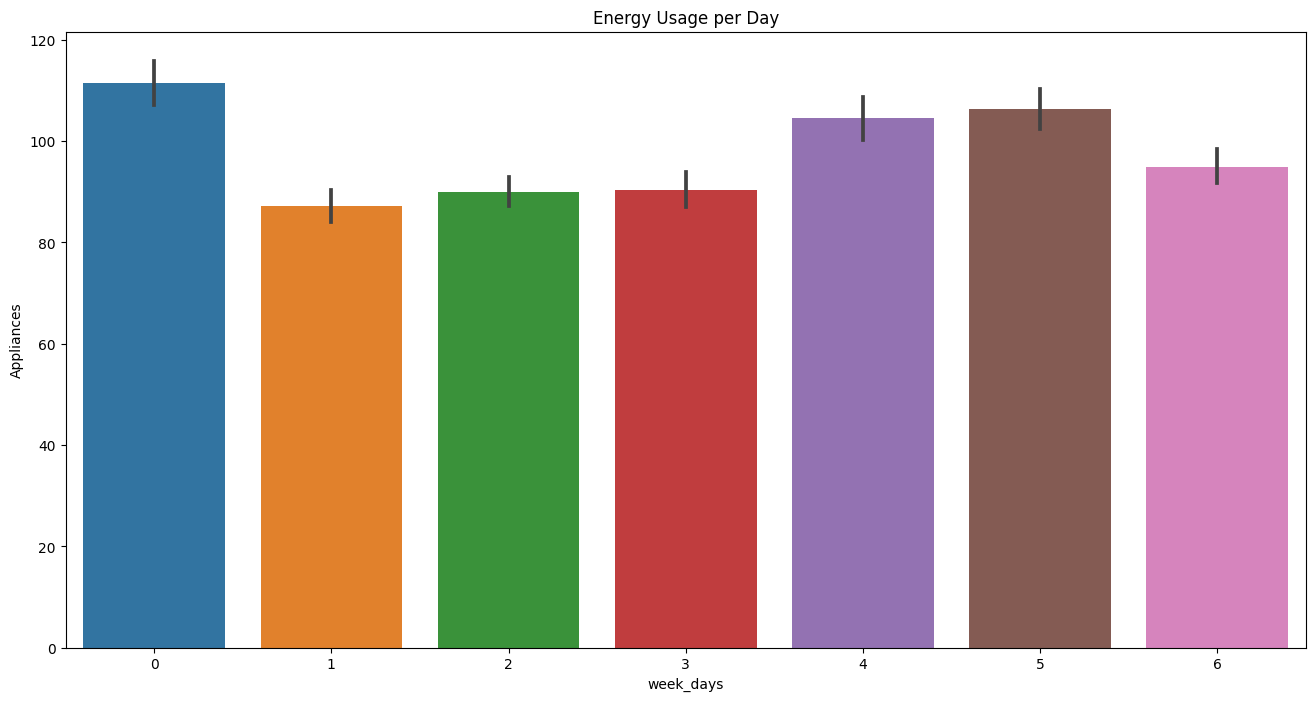

In [27]:
plt.figure(figsize=(16, 8))
sns.barplot(x=data.week_days, y=data.Appliances)
plt.title("Energy Usage per Day")
plt.show()

### Observations

1. Here 0 corresponds to Sunday, which has the highest energy consumption, implying people use more electricity on Sunday.

## Analyzing different Humidity columns with target variable

In [28]:
humidity = data[['RH_1', 'RH_2','RH_3','RH_4','RH_5', 'RH_6','RH_7','RH_8','RH_9']]

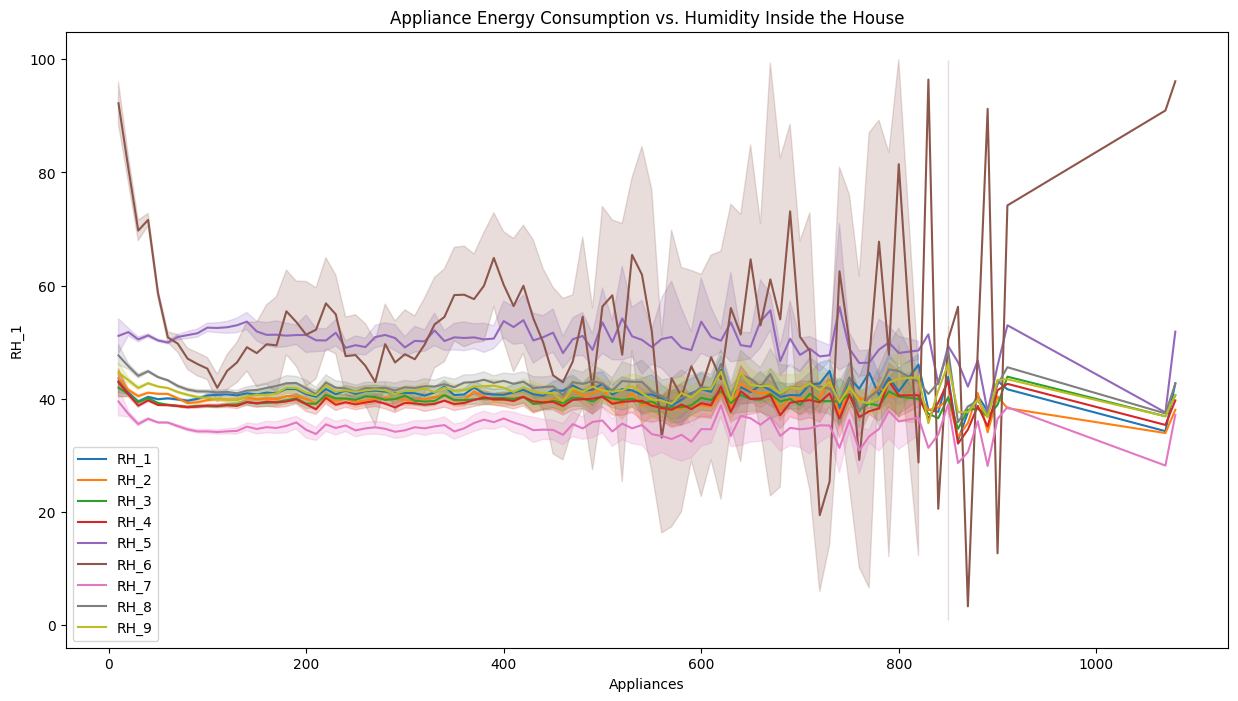

In [29]:
def line_plot(features):
    # figure and size
    plt.figure(figsize=(15, 8))
    for i in features:
        sns.lineplot(data=data, x='Appliances', y=humidity[i], label=i)

    plt.title('Appliance Energy Consumption vs. Humidity Inside the House')
    plt.show()

# Assuming 'data' is the DataFrame containing the 'Appliances' and 'humidity' columns
features = humidity.columns
line_plot(features)


### Observations

1. RH_6 Humidity - is outside humidity of house it has high variation in the values mostly becouse of outside pressure, temperature.

## Analyzing different Temperature columns with target variable

In [30]:
temp=data[['T1', 'T2','T3','T4','T5', 'T6', 'T7',  'T8','T9']]

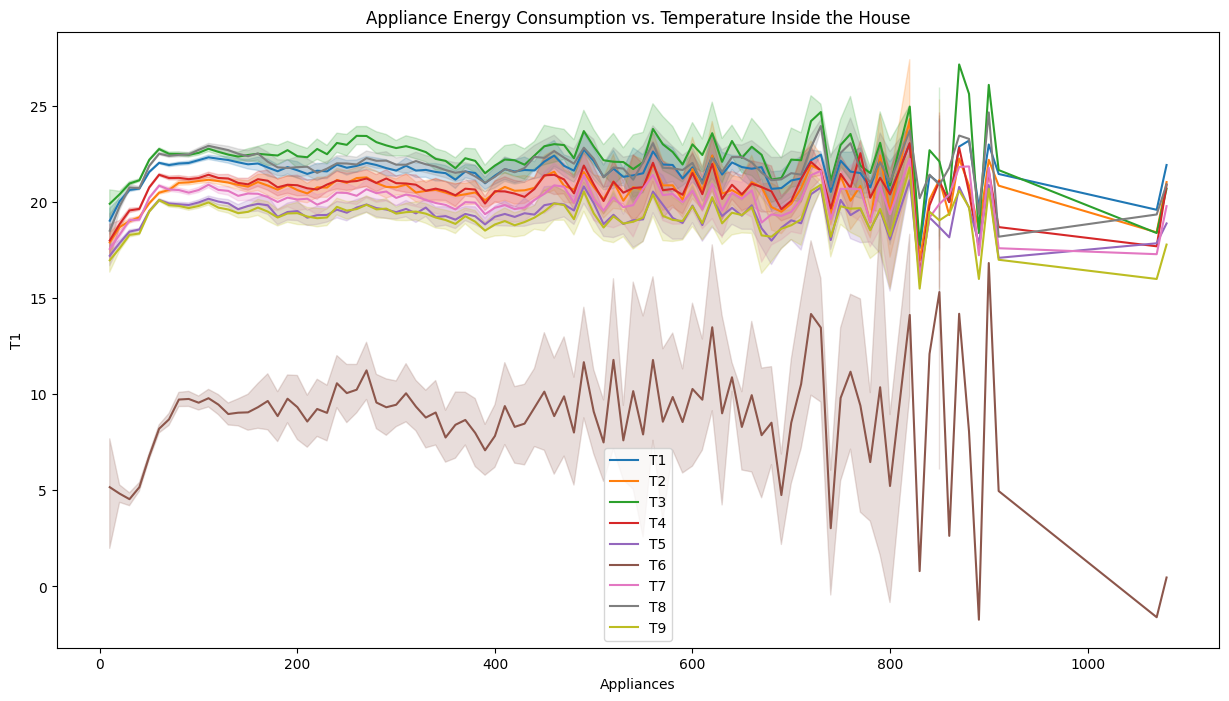

In [31]:
def line_plot(features):
    # figure size
    plt.figure(figsize=(15, 8))
    for i in features:
        sns.lineplot(x=data['Appliances'], y=data[i], label=i)

    plt.title('Appliance Energy Consumption vs. Temperature Inside the House')
    plt.show()

# Assuming 'data' is the DataFrame containing the 'Appliances' and 'temp' columns
features = temp.columns
line_plot(features)


### Observations

1. Except tempertaure T6 all other temperature inside the house are almost constant, the reason being the variation in outer Pressure and Wind Speed  

## Analyzing target variable with Features calculated by weather station

In [32]:
weather_station=data[['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint' ]]

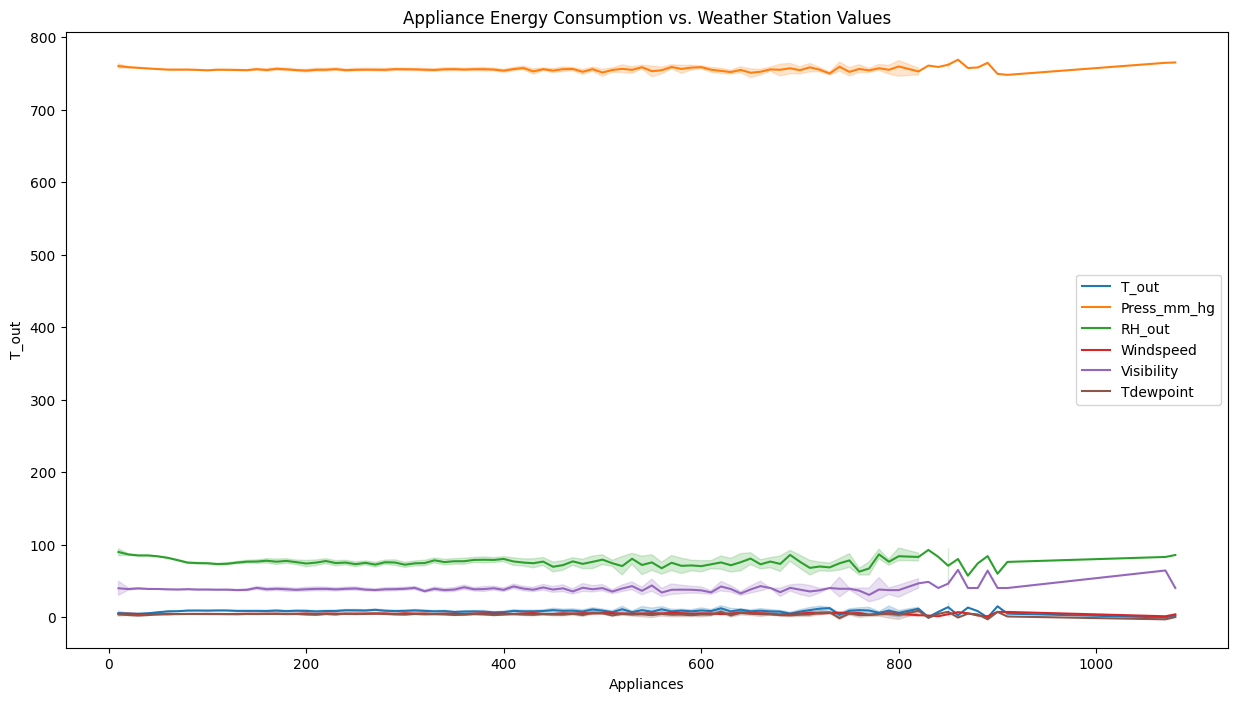

In [33]:
def line_plot(features):
    # figure size
    plt.figure(figsize=(15, 8))
    for i in features:
        sns.lineplot(x=data['Appliances'], y=data[i], label=i)

    plt.title('Appliance Energy Consumption vs. Weather Station Values')
    plt.show()

# Assuming 'data' is the DataFrame containing the 'Appliances' and 'weather_station' columns
features = weather_station.columns
line_plot(features)


### Observations

1. All the features are constant with respect to dates

## Power Consumed per hour

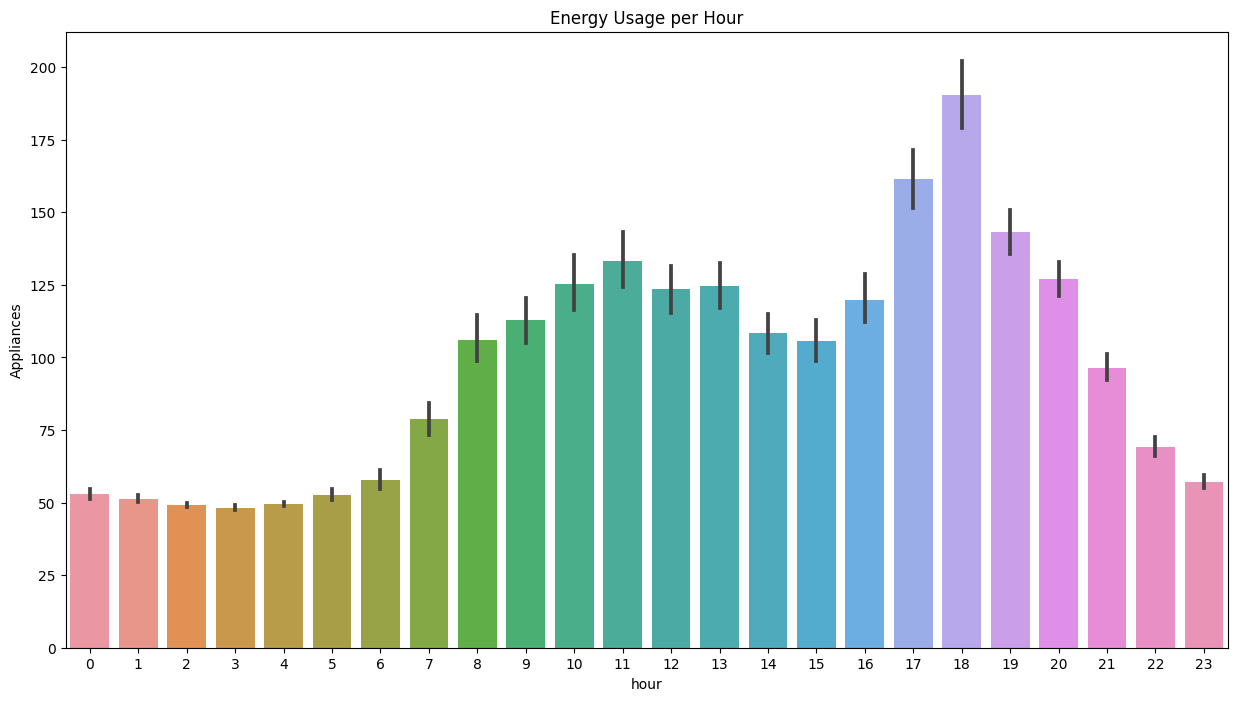

In [34]:
plt.figure(figsize=(15, 8))
sns.barplot(x=data['hour'], y=data['Appliances'])
plt.title('Energy Usage per Hour')
plt.show()


### Observations

Above chart show the average distribution of energy consumed throughout the day for 4.5 months. We can clearly see that there are two peaks one at 11:00 AM which is shallow and low and the other one at 06:00 PM in the evening which is sharper as well as higher.

During sleeping hours (10:00PM to 06:00AM) energy consumption is less about 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.

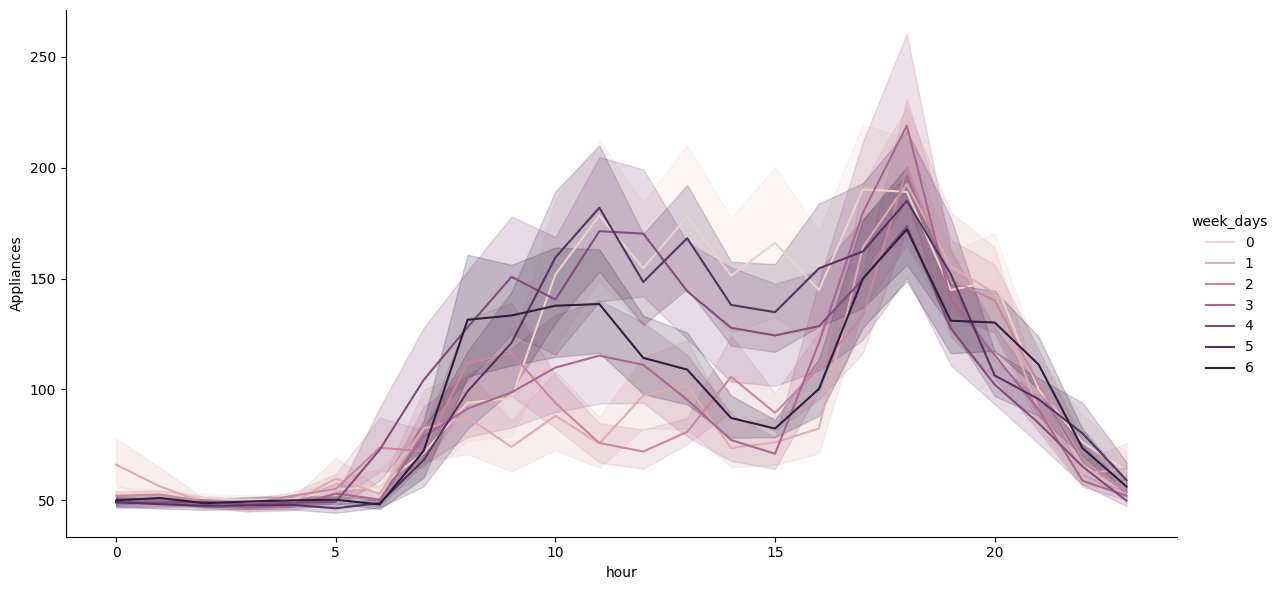

In [35]:
sns.relplot(y='Appliances', x='hour', data=data, kind='line', hue='week_days', height=6, aspect=2.0)
plt.show()

### Observations

1. We see that everyday the usage peaks for 1500-2000 hours. But on 5th and 6th day it is higher for the same hours.

# Feature Selection

In [36]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dates,months,hour,week_days
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,1,17,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,1,17,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,1,17,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00,1,17,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,1,17,0


### Dropping column titled ----> date,dates and lights

Reason: As we are not trying to analyze the problem as Time Series rather regress on "Appliance" column.

In [37]:
data.drop("date",axis=1,inplace=True)

In [38]:
data.drop("dates",axis=1,inplace=True)

In [39]:
data.shape

(19735, 31)

In [40]:
data.drop("lights",axis=1,inplace=True)

## Applying Variance threshold method

The variance threshold is a feature selection method used to remove features with low variance. It assumes that features with low variance contain less useful information for the task at hand.

In [41]:
# Importing library
from sklearn.feature_selection import VarianceThreshold

In [42]:
# Implementing VarianceThreshold
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(data)
selected_features = variance_threshold.get_support()

In [43]:
# Print the selected features
selected_features_array = np.array(data.columns)[selected_features]
print("Selected features:", selected_features_array)

Selected features: ['Appliances' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'RH_4' 'T5' 'RH_5'
 'T6' 'RH_6' 'T7' 'RH_7' 'T8' 'RH_8' 'T9' 'RH_9' 'T_out' 'Press_mm_hg'
 'RH_out' 'Windspeed' 'Visibility' 'Tdewpoint' 'rv1' 'rv2' 'months' 'hour'
 'week_days']


### Observations

1. This shows that there are no features with constant values in our dataset.

## Applying F-regreesion method

F regression is a statistical method used for feature selection in machine learning. It is specifically designed for regression problems, where the target variable is continuous.

The F regression method evaluates the linear relationship between each feature and the target variable by computing the F-statistic and p-value. The F-statistic measures the ratio of the explained variance to the unexplained variance, while the p-value represents the statistical significance of the relationship.

In [44]:
# Importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [45]:
X=data.iloc[:,1:]
Y=data.iloc[:,0]

In [46]:
# Computing the f scores of individual features
f_scores = f_regression(X, Y)
f_scores

(array([6.08546649e+01, 1.47140998e+02, 2.88664211e+02, 7.24083194e+01,
        1.43812455e+02, 2.60243942e+01, 3.20699643e+01, 5.68130299e+00,
        7.70780063e+00, 9.54444046e-01, 2.76909655e+02, 1.37474160e+02,
        1.31448883e+01, 6.12846635e+01, 3.09491920e+01, 1.76061071e+02,
        1.97755919e+00, 5.23984346e+01, 1.95934202e+02, 2.40433596e+01,
        4.68470558e+02, 1.50924181e+02, 1.04712660e-03, 4.65245939e+00,
        2.45132436e+00, 2.45132436e+00, 2.65830480e+00, 9.73160402e+02,
        1.84831825e-01]),
 array([6.44916930e-015, 9.63943146e-034, 2.78494653e-064, 1.87302217e-017,
        5.08641648e-033, 3.40254021e-007, 1.50788109e-008, 1.71560296e-002,
        5.50345129e-003, 3.28602654e-001, 9.33386716e-062, 1.20948068e-031,
        2.89030224e-004, 5.18729570e-015, 2.68310259e-008, 5.21156624e-040,
        1.59663524e-001, 4.69710927e-013, 2.62485380e-044, 9.49392222e-007,
        1.07751629e-102, 1.45647106e-034, 9.74185818e-001, 3.10211263e-002,
        1.1744

### Observations

The second array in the output of f_regression(X, Y) represents the p-values associated with each feature in the input features X.

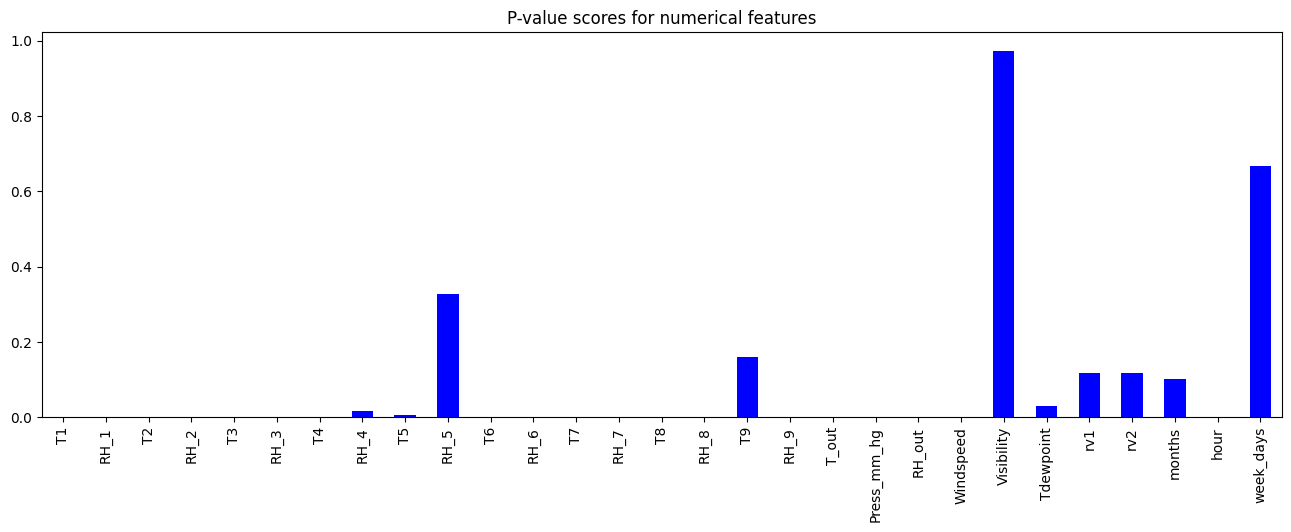

In [47]:
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

### Observations

1. We need to remove the following features- T9, RH_4, RH_5, months, Tdewpoint, Visibility, rv1, rv2 and week_days.

### Dropping the columns

In [48]:
data.drop(['T9',"RH_4",'RH_5','months','Visibility','Tdewpoint','rv1',"rv2","week_days"],axis=1,inplace=True)

In [49]:
# Checking the shape

data.shape

(19735, 21)

## Plotting Heat Map

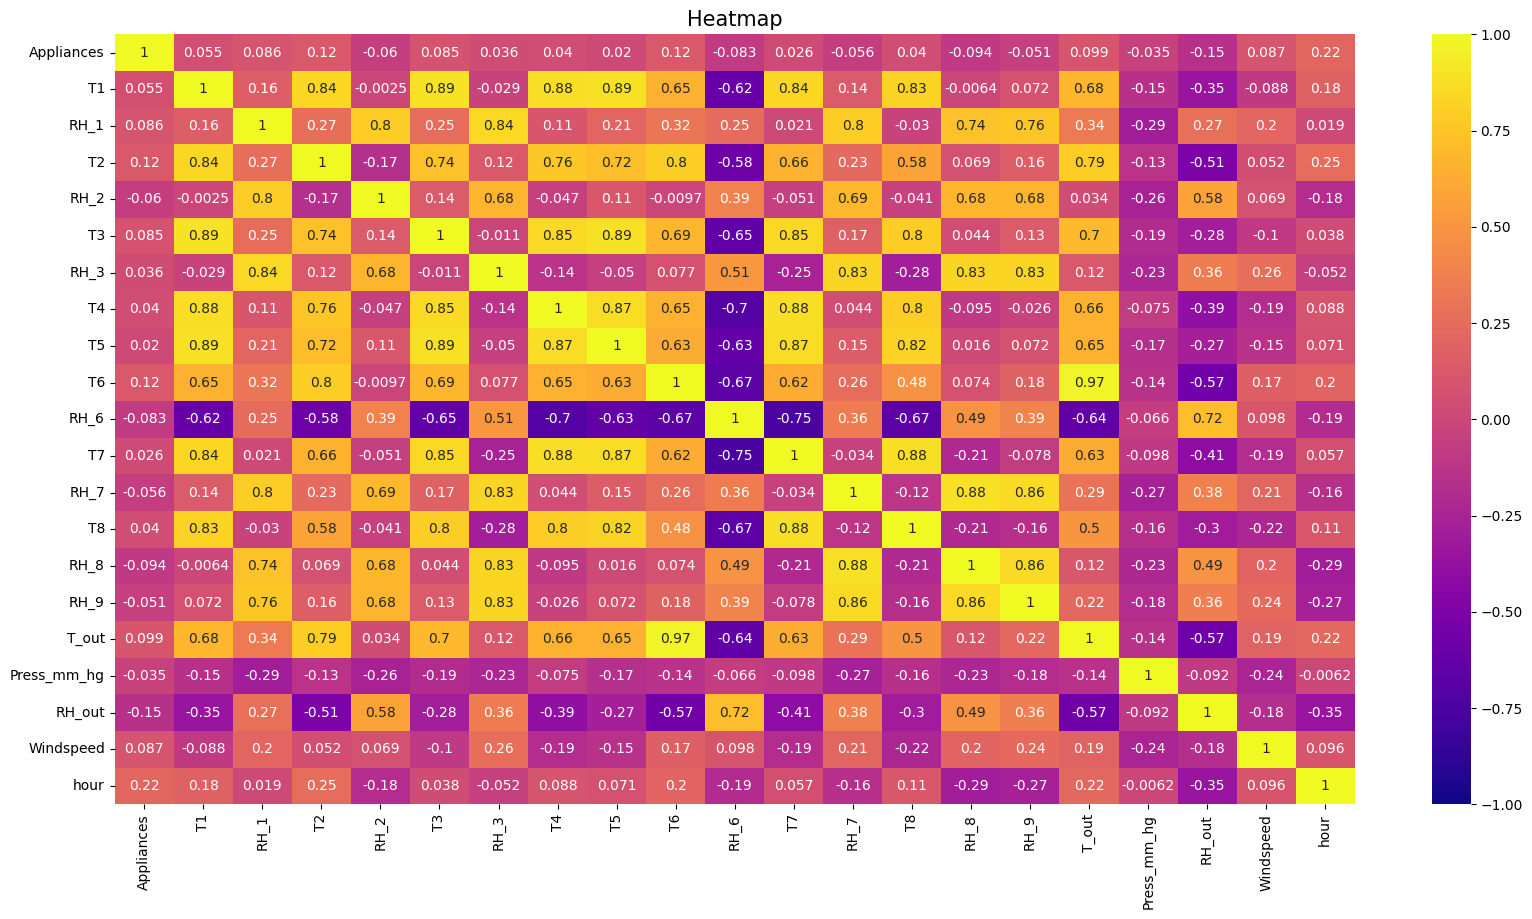

In [50]:
corrmat = data.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(corrmat, vmin=-1,annot = True,cmap='plasma')
plt.title("Heatmap",fontsize= 15)
plt.show()

### Observations

1. Temperature - All the temperature variables from T1-T8 and T_out have positive correlation with the target Appliances .

2. For the indoor temperatures, the correlations are high as expected because the ventilation is driven by the HRV unit and minimizes air temperature differences between rooms.

3. T6 & T_Out has high correlation(both temperatures from outside) . Hence T6 can be removed from training set as information provided by them can be provided by other fields.

4. Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values

5. Humidity -There are no significantly high correlation cases (> 0.9) for humidity sensors.

6. Random variables have no role to play

In [51]:
data.drop('T6', axis=1, inplace=True)

In [52]:
corr_tran_data =data.corr()
corr_tran_data

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,hour
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.019760,-0.083178,0.025801,-0.055642,0.039572,-0.094039,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.216792
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.885247,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.071756,0.682846,-0.150574,-0.345481,-0.087654,0.178858
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.205797,0.245126,0.021397,0.801122,-0.030053,0.736196,0.764001,0.340767,-0.293957,0.274126,0.204932,0.018594
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.720550,-0.580372,0.663660,0.229212,0.578191,0.068534,0.157346,0.792255,-0.133028,-0.505291,0.052495,0.254784
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.110409,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.183322
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.888169,-0.647672,0.847374,0.172624,0.795283,0.044427,0.134602,0.699417,-0.189974,-0.281718,-0.100776,0.037624
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,-0.050062,0.514912,-0.250090,0.832685,-0.283228,0.828822,0.833538,0.118207,-0.233274,0.356192,0.263188,-0.052392
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,0.871813,-0.703149,0.877763,0.043527,0.796256,-0.095192,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,0.088407
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,1.000000,-0.632384,0.870624,0.148905,0.824981,0.016388,0.072308,0.651321,-0.170999,-0.273953,-0.145011,0.071340
RH_6,-0.083178,-0.615045,0.245126,-0.580372,0.389933,-0.647672,0.514912,-0.703149,-0.632384,1.000000,-0.753973,0.357222,-0.665869,0.489580,0.391943,-0.641572,-0.065814,0.718587,0.098317,-0.190277


In [53]:
corr_appliances = corr_tran_data[['Appliances']]
corr_appliances

,Appliances
Appliances,1.000000
T1,0.055447
RH_1,0.086031
T2,0.120073
RH_2,-0.060465
T3,0.085060
RH_3,0.036292
T4,0.040281
T5,0.019760
RH_6,-0.083178


## Checking Multicolinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [55]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Appliances']]]).sort_values(by='VIF',ascending=False)

,variables,VIF
0,T1,3226.037802
2,T2,1953.012342
3,RH_2,1894.135134
1,RH_1,1651.340872
5,RH_3,1443.210024
4,T3,1143.503065
9,T7,1130.757906
11,T8,955.537574
7,T5,951.317078
6,T4,799.535203


### Observations

1. Our dataset has many features with Multi colinearity.

# Feature Engineering

Checking for duplicate values

In [56]:
len(data[data.duplicated()])

0

No Duplicates found

## Checking for Null Values

In [57]:
data.isnull().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
T5             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
hour           0
dtype: int64

No null values found

## Checking Outliers

In [58]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Appliances     2138
T1              515
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
T5              179
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
RH_9             21
T_out           436
Press_mm_hg     219
RH_out          239
Windspeed       214
hour              0
dtype: int64

### Observations

1. There are many features with outliers, which has to be eliminated.

## Outlier Treatment

Removing Outlier

In [59]:
for i  in data.columns:
  if(i=='Appliances'):
   Q1 = data[i].quantile(0.25)
   Q3 = data[i].quantile(0.75)
   IQR = Q3 - Q1

   data=data[(data[i]<(Q3 + 1.5 * IQR))]
   data=data[(data[i]>(Q1 - 1.5 * IQR))]

Again checking for outliers

In [60]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Appliances     857
T1             437
RH_1           127
T2             473
RH_2           199
T3             117
RH_3            11
T4             204
T5             249
RH_6             0
T7               0
RH_7            37
T8              93
RH_8            18
RH_9            23
T_out          332
Press_mm_hg    189
RH_out         279
Windspeed      224
hour             0
dtype: int64

### Observations

1. Total number of Outliers have decresed significantly

### Checking the shape

In [61]:
data.shape

(17597, 20)

# Test-Train Split

In [62]:
Y=data['Appliances']

In [63]:
X=data.iloc[:,1:]

### Splitting the Dataset

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size = 0.2, random_state = 10)
print(X_train.shape)
print(X_test.shape)

(14077, 19)
(3520, 19)


### Scaling Down the dataset using Min-Max Scaler

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Fitting

In [66]:
# try ploynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias=True )
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [67]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [68]:
reg = LinearRegression()
lasso  = Lasso()
ridge = Ridge()
tree1 = DecisionTreeRegressor(random_state=10)
regressor = RandomForestRegressor(random_state=10)
gdb = GradientBoostingRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)
lgbm = LGBMRegressor(random_state=10)

### Defining all the models

In [69]:
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge()],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor()],
           ['RandomForestRegressor: ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', XGBRegressor()],
           ['LGBMRegressor: ', LGBMRegressor()]
        ]

### Storing all the metrics value in the dataframe

In [70]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

In [71]:
metrics = pd.DataFrame(model_data)
metrics

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,17.303593,17.588016,0.312427,0.317623,23.532652,23.851801
1,Lasso:,18.176908,18.551637,0.257384,0.250863,24.456470,24.991352
2,Ridge:,17.303776,17.588532,0.312427,0.317590,23.532656,23.852377
3,PolynomialRegression:,11.389275,12.500642,0.690731,0.618888,15.782632,17.825252
4,DecisionTreeRegressor:,0.000000,12.906250,1.000000,0.486929,0.000000,20.682255
5,RandomForestRegressor:,3.832003,10.387699,0.959188,0.710397,5.733282,15.538564
6,GradientBoostingRegressor:,13.593958,14.254239,0.553749,0.519613,18.958373,20.012651
7,XGBRegressor:,7.895057,11.506432,0.855508,0.658856,10.787798,16.864672
8,LGBMRegressor:,10.314516,11.687117,0.736848,0.654073,14.558434,16.982481


### Observations

1. Random Forest is the best performing model.

# Hyper parameter Tuning and Cross-Validation

In [72]:
!pip install scikit-optimize

In [73]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer

## Lasso Regression

In [74]:
lr_bayes = BayesSearchCV(estimator=lasso,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................alpha=838171.2357877437; total time=   0.0s
[CV] END ............................alpha=838171.2357877437; total time=   0.0s
[CV] END ............................alpha=838171.2357877437; total time=   0.0s
[CV] END ............................alpha=838171.2357877437; total time=   0.0s
[CV] END ............................alpha=838171.2357877437; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........................alpha=1.8795120823711104; total time=   0.0s
[CV] END ...........................alpha=1.8795120823711104; total time=   0.0s
[CV] END ...........................alpha=1.8795120823711104; total time=   0.0s
[CV] END ...........................alpha=1.8795120823711104; total time=   0.0s
[CV] END ...........................alpha=1.8795120823711104; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Lasso(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [75]:
lr_bayes.best_estimator_

Lasso(alpha=0.0027957911567570246)

In [76]:
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.31242350867513646
Test R2 score :  0.31754921967923055


## Ridge Regression

In [77]:
lr_bayes = BayesSearchCV(estimator=ridge,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................alpha=379770.0392690004; total time=   0.0s
[CV] END ............................alpha=379770.0392690004; total time=   0.0s
[CV] END ............................alpha=379770.0392690004; total time=   0.0s
[CV] END ............................alpha=379770.0392690004; total time=   0.0s
[CV] END ............................alpha=379770.0392690004; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................alpha=1.2709155050962536e-06; total time=   0.0s
[CV] END .......................alpha=1.2709155050962536e-06; total time=   0.0s
[CV] END .......................alpha=1.2709155050962536e-06; total time=   0.0s
[CV] END .......................alpha=1.2709155050962536e-06; total time=   0.0s
[CV] END .......................alpha=1.2709155050962536e-06; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [78]:
lr_bayes.best_estimator_

Ridge(alpha=0.9624624101569859)

In [79]:
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.3124268502165213
Test R2 score :  0.3175916502170548


## Polynomial Regression

### Ridge Regression

In [80]:
lr_bayes = BayesSearchCV(estimator=ridge,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_poly,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................alpha=0.0008710667139941628; total time=   1.4s
[CV] END ........................alpha=0.0008710667139941628; total time=   1.4s
[CV] END ........................alpha=0.0008710667139941628; total time=   1.1s
[CV] END ........................alpha=0.0008710667139941628; total time=   0.9s
[CV] END ........................alpha=0.0008710667139941628; total time=   0.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........................alpha=1.6393988751886746; total time=   0.9s
[CV] END ...........................alpha=1.6393988751886746; total time=   1.2s
[CV] END ...........................alpha=1.6393988751886746; total time=   1.4s
[CV] END ...........................alpha=1.6393988751886746; total time=   1.3s
[CV] END ...........................alpha=1.6393988751886746; total time=   1.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [81]:
lr_bayes.best_estimator_

Ridge(alpha=4.3002253692057755)

In [82]:
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_poly,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_poly_test,y_test))

Train R2 square :  0.6774725564730518
Test R2 score :  0.6186527801086114


## Decision Tree Regression

In [83]:
lr_bayes = BayesSearchCV(estimator=tree1,
                        search_spaces = {
                       'max_depth':Integer(4,30) ,
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(10,200),
                                                       },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=17, min_samples_leaf=37, min_samples_split=58; total time=   0.1s
[CV] END max_depth=17, min_samples_leaf=37, min_samples_split=58; total time=   0.1s
[CV] END max_depth=17, min_samples_leaf=37, min_samples_split=58; total time=   0.1s
[CV] END max_depth=17, min_samples_leaf=37, min_samples_split=58; total time=   0.1s
[CV] END max_depth=17, min_samples_leaf=37, min_samples_split=58; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=15, min_samples_leaf=24, min_samples_split=11; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=24, min_samples_split=11; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=24, min_samples_split=11; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=24, min_samples_split=11; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=24, min_samples_split=11; total time=   0.1s
Fitting 5 folds for each of 1 ca

BayesSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=30, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [84]:
lr_bayes.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_leaf=24, min_samples_split=11,
                      random_state=10)

In [85]:
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.6711655967326784
Test R2 score :  0.5705164166277756


## Random Forest

In [86]:
lr_bayes = BayesSearchCV(estimator=regressor,
                         search_spaces = {
                          'max_depth':Integer(4,40) ,
                          'min_samples_leaf': Integer(3,20),
                          'min_samples_split': Integer(3,20),
                          'n_estimators': Integer(10,200),
                          'max_features': ["auto", "sqrt", "log2"],
                          'bootstrap' : [True, False]

                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=8, max_features=log2, min_samples_leaf=18, min_samples_split=5, n_estimators=176; total time=   4.2s
[CV] END bootstrap=False, max_depth=8, max_features=log2, min_samples_leaf=18, min_samples_split=5, n_estimators=176; total time=   4.4s
[CV] END bootstrap=False, max_depth=8, max_features=log2, min_samples_leaf=18, min_samples_split=5, n_estimators=176; total time=   5.2s
[CV] END bootstrap=False, max_depth=8, max_features=log2, min_samples_leaf=18, min_samples_split=5, n_estimators=176; total time=   4.0s
[CV] END bootstrap=False, max_depth=8, max_features=log2, min_samples_leaf=18, min_samples_split=5, n_estimators=176; total time=   4.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=11, min_samples_split=10, n_estimators=106; total time=   6.7s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, m

BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'bootstrap': [True, False],
                             'max_depth': Integer(low=4, high=40, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [87]:
lr_bayes.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=33, max_features='sqrt',
                      min_samples_leaf=6, min_samples_split=16, n_estimators=23,
                      random_state=10)

In [88]:
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.8558460679961842
Test R2 score :  0.6985188647652266


## GradientBoost Regressor

In [89]:
lr_bayes = BayesSearchCV(estimator=gdb ,
                           search_spaces = {
                           'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                          "criterion":['friedman_mse', 'squared_error'],
                          'max_depth': Integer(4,6),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,200)
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, loss=absolute_error, max_depth=5, min_samples_leaf=73, min_samples_split=63, n_estimators=88; total time=   7.0s
[CV] END criterion=friedman_mse, loss=absolute_error, max_depth=5, min_samples_leaf=73, min_samples_split=63, n_estimators=88; total time=   7.2s
[CV] END criterion=friedman_mse, loss=absolute_error, max_depth=5, min_samples_leaf=73, min_samples_split=63, n_estimators=88; total time=   6.9s
[CV] END criterion=friedman_mse, loss=absolute_error, max_depth=5, min_samples_leaf=73, min_samples_split=63, n_estimators=88; total time=   7.2s
[CV] END criterion=friedman_mse, loss=absolute_error, max_depth=5, min_samples_leaf=73, min_samples_split=63, n_estimators=88; total time=   7.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, loss=quantile, max_depth=6, min_samples_leaf=92, min_samples_split=132, n_estimators=30; total time=   2.6s
[CV] END cr

BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=10),
              n_iter=10, scoring='r2',
              search_spaces={'criterion': ['friedman_mse', 'squared_error'],
                             'loss': ['squared_error', 'absolute_error',
                                      'huber', 'quantile'],
                             'max_depth': Integer(low=4, high=6, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [90]:
lr_bayes.best_estimator_

GradientBoostingRegressor(loss='huber', max_depth=4, min_samples_leaf=15,
                          min_samples_split=119, n_estimators=187,
                          random_state=10)

In [91]:
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.6433311010150291
Test R2 score :  0.5932777557840763


## XGBoost Regression

In [92]:
lr_bayes = BayesSearchCV(estimator=xgb ,
                       search_spaces = {
                          'max_depth': Integer(4,25),
                          'min_samples_split' :Integer(10,200),
                          'n_estimators': Integer(10,200),
                          'min_samples_leaf' :Integer(10,200)
                        },cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[09:56:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=11, min_samples_leaf=97, min_samples_split=41, n_estimators=195; total time=   9.5s
[09:56:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=11, min_samples_leaf=97, min_samples_split=41, n_estimators=195; total time=   9.4s
[09:56:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=11, min_samples_leaf=97, min_samples_split=41, n_estimators=195; total time=   9.4s
[09:57:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=11, min_samples_leaf=97, min_samples_split=41, n_estimators=195; total time=   7.1s
[09:57:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_sample

BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
              n_iter=10, scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=25, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [93]:
lr_bayes.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=None, min_samples_leaf=120, min_samples_split=175,
             missing=nan, monotone_constraints=None, n_estimators=17,
             n_jobs=None, num_parallel_tree=None, ...)

In [94]:
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.9364980466617698
Test R2 score :  0.6783711906588628


## Comparing all Model Accuracy

In [95]:
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso(alpha=0.0002953248602060644, max_iter=3000, random_state=10)],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge(alpha=0.00037654260652948403, max_iter=3000)],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor(max_depth=11, min_samples_leaf=25, min_samples_split=91,
                      random_state=10)],
           ['RandomForestRegressor: ',RandomForestRegressor(max_depth=23, max_features='log2', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=73, random_state=10)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor(max_depth=6, min_samples_leaf=96,
                          min_samples_split=117, n_estimators=124,random_state=10)] ,
           ['XGBRegressor: ', XGBRegressor(max_depth=9, min_samples_leaf=77, min_samples_split=10,
             n_estimators=178, random_state=10)],
           ['LGBMRegressor: ', LGBMRegressor(max_depth=19, min_split_gain=2, n_estimators=124, n_jobs=17,
              num_leaves=183, random_state=10)]
        ]

In [96]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

[10:03:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



In [97]:
metrics = pd.DataFrame(model_data)
metrics

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,17.303593,17.588016,0.312427,0.317623,23.532652,23.851801
1,Lasso:,17.303677,17.588252,0.312427,0.317616,23.532652,23.851932
2,Ridge:,17.303776,17.588532,0.312427,0.317590,23.532656,23.852377
3,PolynomialRegression:,11.296273,12.705824,0.699887,0.607834,15.547259,18.081901
4,DecisionTreeRegressor:,12.818136,13.958515,0.596552,0.530430,18.026248,19.786049
5,RandomForestRegressor:,6.693986,10.650576,0.875777,0.701961,10.002581,15.763239
6,GradientBoostingRegressor:,11.283794,12.416449,0.681364,0.615583,16.019865,17.902374
7,XGBRegressor:,2.584141,10.970320,0.984349,0.681114,3.550434,16.305215
8,LGBMRegressor:,6.375924,10.631450,0.902580,0.702723,8.858004,15.743072


### Plotting the above dataframe

<Axes: title={'center': 'R2 Score Results'}, xlabel='Name'>

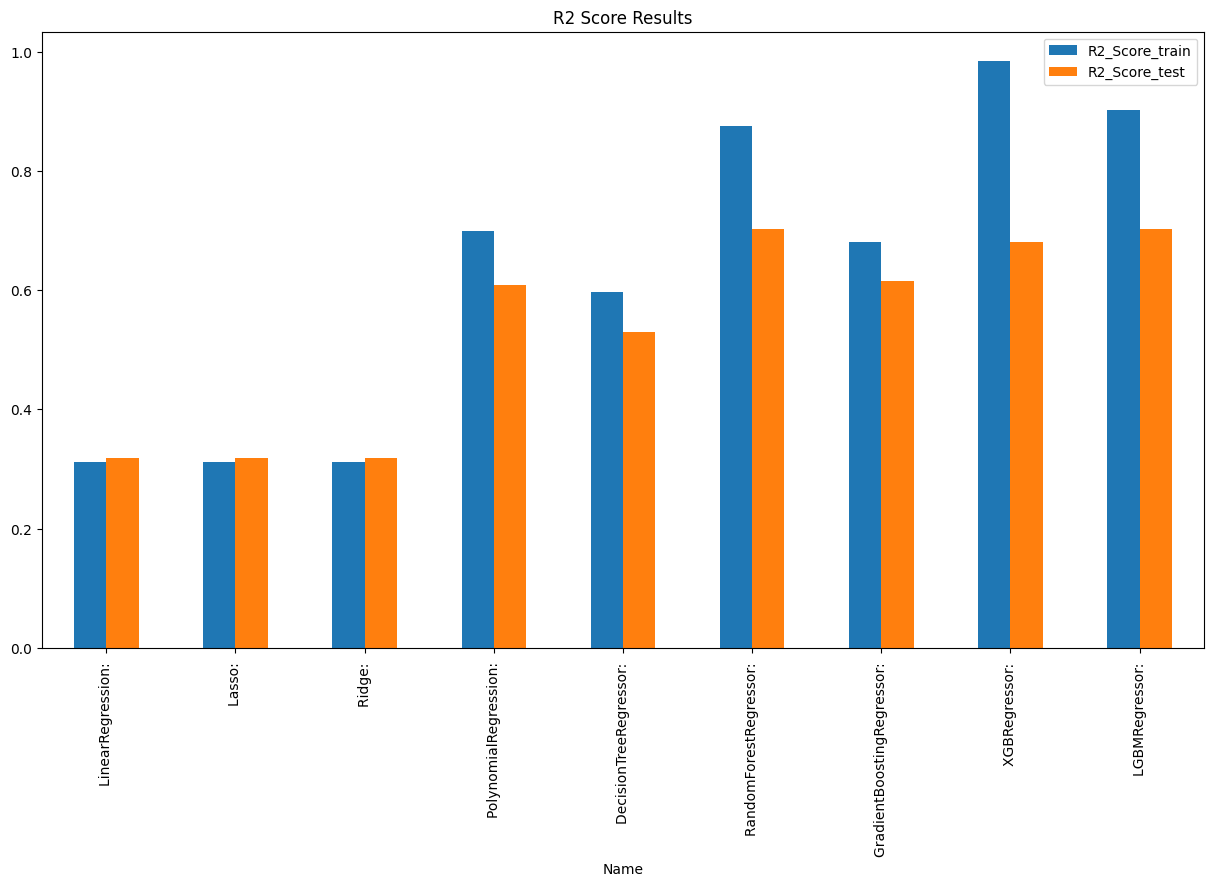

In [98]:
metrics.plot(x="Name", y=['R2_Score_train' , 'R2_Score_test'], kind="bar" , title = 'R2 Score Results' , figsize= (15,8))

### Observations


1. From the above dataframe we can say that linearRegression is not performing well.

2. XGBRegression is giving r2 value of 0.91 for train data and 0.69 for test data.

3. LGBMRegression is giving r2 value 0.90 for train data and 0.70 for test data.

4. RandomForest Regression is giving r2 value of 0.87 train data and 0.70for test data.

5. By comparing all these models we can say that randomforest regressor is performing good having high r2 score and MSE, RMSE value is also low for random forest.

# Model Expalinability

In [99]:
#install ELI5
! pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107729 sha256=35f340d15130edc38665082d3306cc2c53b7f94f8f7d84648ba9a8f130d69e00
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [106]:
#import eli5
import eli5 as eli

# Create the RandomForestRegressor instance
regressor = RandomForestRegressor()

# Fit the model to training data
regressor.fit(X_train, y_train)

#explain the weights
eli.explain_weights(regressor,feature_names = list(X.columns))

Weight,Feature
0.3504 ± 0.0178,hour
0.0987 ± 0.0188,T8
0.0506 ± 0.0227,Press_mm_hg
0.0387 ± 0.0141,RH_9
0.0371 ± 0.0126,T_out
0.0369 ± 0.0126,RH_6
0.0367 ± 0.0186,T7
0.0345 ± 0.0121,T4
0.0329 ± 0.0162,T5
0.0314 ± 0.0116,RH_1


### Observations

From the above figure, we can conclude that the hour feature is most important for the prediction of appliance energy, followed by Tdewpoint and hu_build_out and the least imporatnt feature is month

# Conclusion

1) Main aim of the project is to predict energy consumption of Appliances. First we analyse data information data set is collected in regualar interval of time so its time series data but we are not implementing time series technique on the model because of less knowledge on time series.

2) Then we used the matplotlib and seaborn to do Exploratory Data Analysis on data by plotting different graphs like scatter plot,barplot,boxplot, subplot and heat map from this we got useful insights like:

Many columns in the dataset has not normally distributed and target column is also right skewed
Dataset has many outliers and no null values
We have hours column is high correlation with dependent variable and there are lot features have lesser than 0.1 correlation with dependent variable and its non linear dataset.
Energy consumption in month of march is high and low in jan month and increase in temp leads to more energy consumption
Decrease in Humidity leads increase in power consumption. Humidity is inversely proportional to dependent variable.
Hour of the Day is the most important influencing parameter for Energy consumption
High Electricity consumption of >140Wh is observed during evening hours 16:00 to 20:00. Weekends (Saturdays and Sundays) are observed to have high consumption of Electricity. (> 25% than Weekdays)
lights are having very low importance as a feature.

3) In feature selection we used variance threshold , f_regression and Pearson correlation matrix removed features that are not important for predicting dependent variable.

4) In feature engineering technique removed outliers in our model

5) implementing Linearregression, Polynomial regression, Decision tree, Random forest, Gradient boosting ,XGBM and LGBM regression algorithum used and did cross validation hyperparameter tuning done on the all models. by comparing all models randomforest regressor performing good having high r2 score and MSE, RMSE value is also low for random forest. some overfitting is happening becouse of dataset is time series and not implementing time series concept.

6) In Model explainability shap technique is used to know which are the features are imoprtant for predicting output and understanding model.Hour feature is most important feature.

### Improvemente points:

Definitely, we have a scope of improvement here, specially in the feature engineering. Many of the features are skewed. We can do some more EDA and FE to extract better features which can have better relationships with the target variable. Below are some more transformation which we can do to data.

Data we have in regualr interval of time we can implement time series concept on the data and analyse how the accuracy is varying.

To handle skeweness data:

We can apply some transformation like log, exp, boxcox, reciprocal on skewed features.
We can do discretisation on on some highly skewed data and check how it is performing.
Treat outliers as missing data and do imputation on them
Discretization
Model interpretation:
We can also use shap value to interprete the predictions.